# Importing the libraries

In [226]:
from sklearn.datasets import load_boston, load_breast_cancer, load_iris, fetch_lfw_people

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import losses
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold




from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV




import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [227]:
import tensorflow as tf

In [228]:
a = tf.Variable(3, name = 'a')
b = tf.Variable(4, name = 'b')
f = tf.multiply(a,b)
f

<tf.Tensor 'Mul:0' shape=() dtype=int32>

In [229]:
init = tf.global_variables_initializer()

with tf.Session() as sess: 
    init.run()
    result = f.eval()
    print (result)

12


# Regression 

In [230]:
data=load_boston()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

ss = StandardScaler()
ss_fit = ss.fit(X_train)

X_train = ss_fit.transform(X_train)
y_train = y_train.reshape(-1,1)

X_test = ss_fit.transform(X_test)
y_test = y_test.reshape(-1,1)

In [231]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 13, name='hidden1', activation=tf.nn.relu) # First hidden layer 
y_hat = tf.layers.dense(h1, 1, activation=None) # output layer 

loss = tf.losses.mean_squared_error(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)
training_op = optimizer.minimize(loss)

In [232]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(10):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        print ('epoch', epoch+1, 'training loss: ', train_loss)
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print ('epoch', epoch + 1, 'testing loss: ', test_loss )
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

epoch 1 training loss:  537.975
epoch 1 testing loss:  610.462
epoch 2 training loss:  529.855
epoch 2 testing loss:  601.133
epoch 3 training loss:  521.521
epoch 3 testing loss:  591.541
epoch 4 training loss:  512.98
epoch 4 testing loss:  581.701
epoch 5 training loss:  504.256
epoch 5 testing loss:  571.702
epoch 6 training loss:  495.275
epoch 6 testing loss:  561.418
epoch 7 training loss:  486.006
epoch 7 testing loss:  550.84
epoch 8 training loss:  476.478
epoch 8 testing loss:  539.962
epoch 9 training loss:  466.718
epoch 9 testing loss:  528.766
epoch 10 training loss:  456.734
epoch 10 testing loss:  517.276


In [233]:
'''Code from Riley'''

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(200):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print('epoch', epoch+1, 'training loss', train_loss, 'test loss', test_loss)
    pred = sess.run(y_hat, feed_dict={X: X_test})

epoch 1 training loss 563.466 test loss 642.415
epoch 2 training loss 556.414 test loss 634.664
epoch 3 training loss 549.338 test loss 626.93
epoch 4 training loss 542.226 test loss 619.152
epoch 5 training loss 534.998 test loss 611.26
epoch 6 training loss 527.653 test loss 603.269
epoch 7 training loss 520.168 test loss 595.178
epoch 8 training loss 512.571 test loss 586.97
epoch 9 training loss 504.876 test loss 578.608
epoch 10 training loss 497.051 test loss 570.103
epoch 11 training loss 489.098 test loss 561.431
epoch 12 training loss 481.005 test loss 552.618
epoch 13 training loss 472.754 test loss 543.583
epoch 14 training loss 464.353 test loss 534.299
epoch 15 training loss 455.796 test loss 524.738
epoch 16 training loss 447.078 test loss 514.696
epoch 17 training loss 438.179 test loss 504.426
epoch 18 training loss 429.129 test loss 493.899
epoch 19 training loss 419.921 test loss 483.103
epoch 20 training loss 410.592 test loss 472.086
epoch 21 training loss 401.165 t

In [234]:
r2_score(y_test, pred)

0.82631501216540959

# Classification 

In [235]:
data = load_breast_cancer()

target = data.target * -1 + 1
target = target.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(data.data, target)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [236]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
y_hat = tf.layers.dense(h1, units = 1, name='y_hat', activation=tf.nn.sigmoid)


loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)

training_op = optimizer.minimize(loss)

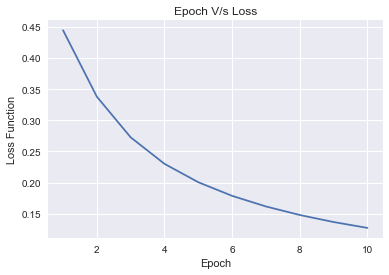

In [237]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    training_loss_list = []
    epoch_list = []
    for epoch in range(10):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_loss_list.append(train_loss)
        epoch_list.append(epoch+1)
        
    plt.plot(epoch_list, training_loss_list)
    plt.title('Epoch V/s Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Function')
    plt.show()

In [238]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
y_hat = tf.layers.dense(h1, units = 1, name='y_hat', activation=tf.nn.sigmoid)


loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)

training_op = optimizer.minimize(loss)

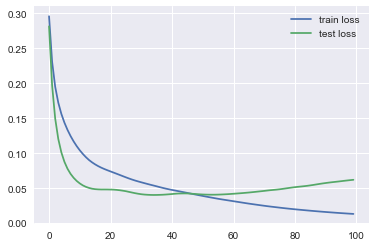

In [239]:
'''Code from Riley'''

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,101))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()


# Using Batches and Kfold

In [240]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
h2 = tf.layers.dense(X, 30, name='hidden2', activation=tf.nn.relu)
h3 = tf.layers.dense(X, 30, name='hidden3', activation=tf.nn.relu)
h4 = tf.layers.dense(X, 30, name='hidden4', activation=tf.nn.relu)
y_hat = tf.layers.dense(h1, units = 1, name='y_hat', activation=tf.nn.sigmoid)


loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.01)

training_op = optimizer.minimize(loss)

In [241]:
kf = KFold(2, shuffle=True, random_state=2003)

batches = []
for train, test in kf.split(X_train, y_train):
    batches.append(test)

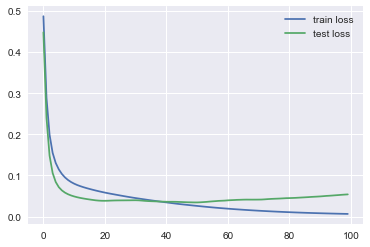

In [242]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,101))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        for batch in batches: 
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op, feed_dict={X: X_train, y: y_train})
            
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
    pred = sess.run(y_hat, feed_dict={X: X_test})
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()


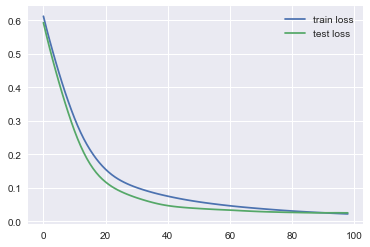

In [243]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 30, name='hidden1', activation=tf.nn.relu)
h2 = tf.layers.dense(h1, 30, name='hidden2', activation=tf.nn.relu)
h3 = tf.layers.dense(h2, 30, name='hidden3', activation=tf.nn.relu)
y_hat = tf.layers.dense(h3, 1, name='y_hat', activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(.001)

training_op = optimizer.minimize(loss)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    epochs = list(range(1,100))
    training_losses = []
    test_losses = []
    for epoch in epochs:
        for batch in batches:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        training_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        training_losses.append(training_loss)
        
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_losses.append(test_loss)
    pred = sess.run(y_hat, feed_dict={X: X_test})
        
plt.plot(training_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

In [244]:
pred = (pred > .5).astype(int)

In [245]:
r2_score(y_test, pred)

0.96757369614512467

In [246]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[97,  1],
       [ 0, 45]])

# MultiClassification

In [247]:
data = load_iris()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [256]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None), name='y')

h1 = tf.layers.dense(X, 4, activation=tf.nn.relu, name='hidden1')
y_hat = tf.layers.dense(h1, y_train.shape[1], name='y_hat', activation=None)

loss = tf.losses.softmax_cross_entropy(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.01)
training_op = optimizer.minimize(loss)

saver = tf.train.Saver()

In [257]:
init = tf.global_variables_initializer()

with tf.Session() as sess: 
    init.run()
    
    for epoch in range(20): 
        sess.run(training_op, feed_dict = {X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict = {X: X_train, y: y_train})
        print ('Epoch: ', epoch +1 , 'Training Loss: ', train_loss)
        
    saver.save(sess, './iris.ckpt', )

Epoch:  1 Training Loss:  1.06594
Epoch:  2 Training Loss:  1.05594
Epoch:  3 Training Loss:  1.04677
Epoch:  4 Training Loss:  1.03784
Epoch:  5 Training Loss:  1.02891
Epoch:  6 Training Loss:  1.01983
Epoch:  7 Training Loss:  1.01037
Epoch:  8 Training Loss:  1.00037
Epoch:  9 Training Loss:  0.989991
Epoch:  10 Training Loss:  0.979089
Epoch:  11 Training Loss:  0.967713
Epoch:  12 Training Loss:  0.955813
Epoch:  13 Training Loss:  0.943473
Epoch:  14 Training Loss:  0.930735
Epoch:  15 Training Loss:  0.917505
Epoch:  16 Training Loss:  0.903792
Epoch:  17 Training Loss:  0.889499
Epoch:  18 Training Loss:  0.874763
Epoch:  19 Training Loss:  0.859532
Epoch:  20 Training Loss:  0.843835


# Shape

In [264]:
with tf.Session() as sess:
    saver.restore(sess, './iris.ckpt')
    pred = sess.run(y_hat, feed_dict={X: X_train, y: y_train})

INFO:tensorflow:Restoring parameters from ./iris.ckpt


In [265]:
pred

array([[  2.44711846e-01,  -3.12213957e-01,  -5.67115724e-01],
       [ -2.45592296e-01,  -3.25671673e-01,   5.86384118e-01],
       [  2.06668496e-01,  -3.34188998e-01,  -3.08670044e-01],
       [  7.07370490e-02,   4.33320105e-01,  -1.92042261e-01],
       [ -1.27899587e-01,  -2.76186287e-01,   4.23200339e-01],
       [ -2.94311583e-01,   7.89501429e-01,  -3.04229736e-01],
       [  1.51356936e-01,  -1.58769250e-01,   3.60044092e-02],
       [  4.36754823e-02,   1.27955869e-01,   4.09315601e-02],
       [ -5.14078200e-01,  -4.38560069e-01,   9.58646357e-01],
       [  1.06352001e-01,   4.44382727e-02,   2.45184079e-02],
       [  9.78404805e-02,   6.89488828e-01,  -4.62502599e-01],
       [  2.09736660e-01,  -3.80730152e-01,  -3.77441049e-01],
       [ -1.34415030e-01,  -2.78925776e-01,   4.32234138e-01],
       [  1.25002369e-01,   8.88618231e-01,  -6.61215067e-01],
       [ -7.82489479e-02,   2.20901921e-01,   1.77768469e-01],
       [ -4.94689882e-01,  -4.30408001e-01,   9.3176400